In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix,accuracy_score

In [2]:
data = pd.read_csv(r'C:\Users\BHAWNA KUMARI\Desktop\FlightDelays.csv') # data -> Pandas dataframe
data.head()

,CRS_DEP_TIME,CARRIER,DEP_TIME,DEST,DISTANCE,FL_DATE,FL_NUM,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,TAIL_NUM,Flight Status
0,1455,OH,1455,JFK,184,01/01/2004,5935,BWI,0,4,1,N940CA,ontime
1,1640,DH,1640,JFK,213,01/01/2004,6155,DCA,0,4,1,N405FJ,ontime
2,1245,DH,1245,LGA,229,01/01/2004,7208,IAD,0,4,1,N695BR,ontime
3,1715,DH,1709,LGA,229,01/01/2004,7215,IAD,0,4,1,N662BR,ontime
4,1039,DH,1035,LGA,229,01/01/2004,7792,IAD,0,4,1,N698BR,ontime


In [3]:
data.describe()

,CRS_DEP_TIME,DEP_TIME,DISTANCE,FL_NUM,Weather,DAY_WEEK,DAY_OF_MONTH
count,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000,2201.000000
mean,1371.938664,1369.298955,211.871422,3815.086324,0.014539,3.905498,16.024989
std,432.697149,442.462754,13.316815,2409.750224,0.119725,1.903149,8.677390
min,600.000000,10.000000,169.000000,746.000000,0.000000,1.000000,1.000000
25%,1000.000000,1004.000000,213.000000,2156.000000,0.000000,2.000000,8.000000
50%,1455.000000,1450.000000,214.000000,2385.000000,0.000000,4.000000,16.000000
75%,1710.000000,1709.000000,214.000000,6155.000000,0.000000,5.000000,23.000000
max,2130.000000,2330.000000,229.000000,7924.000000,1.000000,7.000000,31.000000


In [4]:
data.groupby('Flight Status').size()

Flight Status
delayed     428
ontime     1773
dtype: int64

In [5]:
data.isnull().sum()

CRS_DEP_TIME     0
CARRIER          0
DEP_TIME         0
DEST             0
DISTANCE         0
FL_DATE          0
FL_NUM           0
ORIGIN           0
Weather          0
DAY_WEEK         0
DAY_OF_MONTH     0
TAIL_NUM         0
Flight Status    0
dtype: int64

In [6]:
data = data.drop(labels=['CRS_DEP_TIME', 'DEP_TIME', 'FL_DATE', 'FL_NUM', 'TAIL_NUM'], axis=1)

In [7]:
data.head()

,CARRIER,DEST,DISTANCE,ORIGIN,Weather,DAY_WEEK,DAY_OF_MONTH,Flight Status
0,OH,JFK,184,BWI,0,4,1,ontime
1,DH,JFK,213,DCA,0,4,1,ontime
2,DH,LGA,229,IAD,0,4,1,ontime
3,DH,LGA,229,IAD,0,4,1,ontime
4,DH,LGA,229,IAD,0,4,1,ontime


In [8]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1].values

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x['CARRIER'] = le.fit_transform(x['CARRIER'])
x['DEST'] = le.fit_transform(x['DEST'])
x['ORIGIN'] = le.fit_transform(x['ORIGIN'])
y = le.fit_transform(y)

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, random_state = 0)

In [11]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [12]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train,y_train)

C:\Users\BHAWNA KUMARI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [13]:
print(x_train)

[[ 1.6465852   0.87484866  0.154146   ... -0.13316618 -0.99671168
  -0.3606635 ]
 [-1.00941374 -1.38946551  0.08061051 ... -0.13316618 -0.99671168
  -1.16835395]
 [-0.56674725  0.87484866  0.154146   ... -0.13316618  0.58969437
  -0.8222009 ]
 ...
 [-1.00941374  0.87484866  1.25717849 ... -0.13316618 -1.5255137
  -0.47604785]
 [ 0.76125222 -1.38946551  0.08061051 ... -0.13316618 -1.5255137
  -0.47604785]
 [ 1.6465852   0.87484866  0.154146   ... -0.13316618  0.58969437
   0.79317999]]


In [14]:
y_pred = np.array(lg.predict(x_test))

In [15]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 0]
 [1 1]]


In [16]:
print(confusion_matrix(y_pred,y_test))
accuracy_score(y_test,y_pred) 

[[  9   0]
 [160 712]]


0.8183881952326901

In [17]:
from sklearn.decomposition import PCA
x = scale.fit_transform(x)

In [18]:
pca = PCA(n_components = 3)
fit = pca.fit_transform(x)

In [19]:
fit = pd.DataFrame(data = fit, columns= ['Feature_1','Feature_2','Feature_3'])

In [20]:
print(fit)

      Feature_1  Feature_2  Feature_3
0      2.921973   0.188264  -0.796792
1     -0.097942   0.692789  -0.933490
2     -2.202756  -0.062738  -1.198471
3     -2.202756  -0.062738  -1.198471
4     -2.202756  -0.062738  -1.198471
...         ...        ...        ...
2196   1.469059   0.937808   0.570987
2197  -0.305167   1.109850   0.443367
2198   1.469059   0.937808   0.570987
2199   1.469059   0.937808   0.570987
2200   1.469059   0.937808   0.570987

[2201 rows x 3 columns]


In [21]:
X_train,X_test,Y_train,Y_test = train_test_split(fit,y,test_size=0.4, random_state = 0)

In [22]:
lg.fit(X_train,Y_train)

C:\Users\BHAWNA KUMARI\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
Y_pred = lg.predict(X_test)

In [24]:
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[1 1]
 [1 0]
 [1 1]
 ...
 [1 1]
 [1 0]
 [1 1]]


In [25]:
print(confusion_matrix(Y_pred,Y_test))

[[  9   0]
 [160 712]]


In [26]:
accuracy_score(Y_pred,Y_test)

0.8183881952326901

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\BHAWNA KUMARI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\BHAWNA KUMARI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


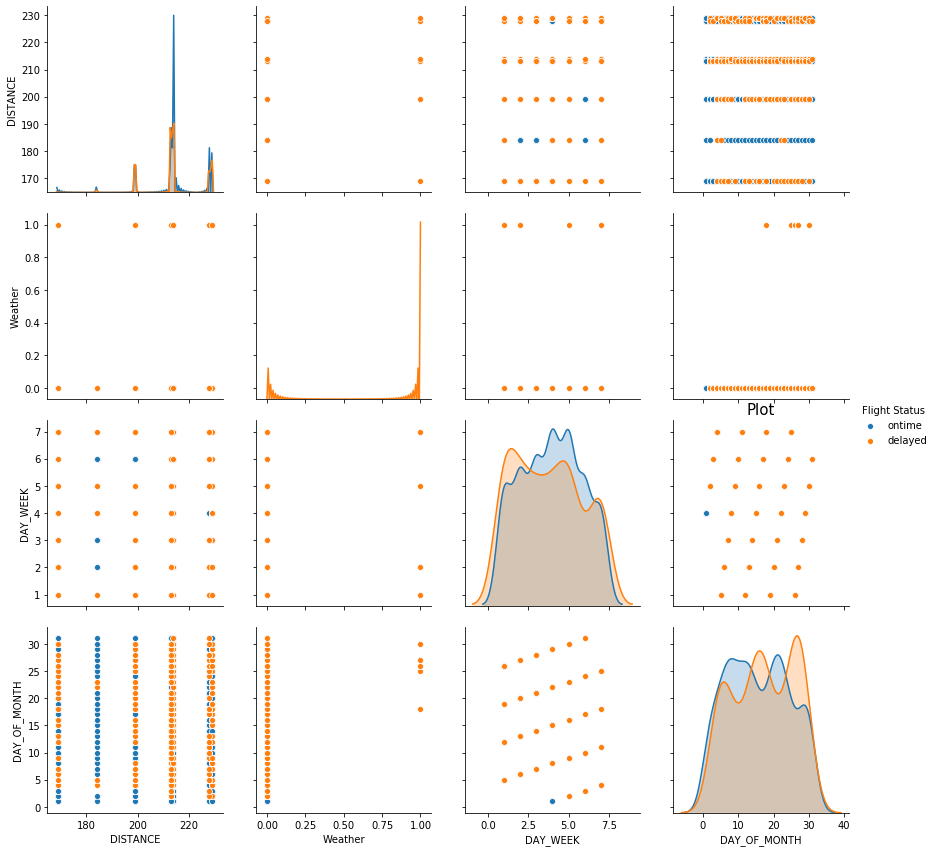

In [28]:
sns.pairplot(data, hue='Flight Status', height=3)
plt.title(size = 15, label = 'Plot')
plt.show()